#Análisis Exploratorio inicial

Angel Rafael Ortega Ramírez 	123972

Elizabeth Rodriguez 	191430

Karla Alfaro Pizaña 	137314

Leonardo Marín 	175903

Mario Rodríguez 	164471

Elizabeth Viveros

####Los sets de datos a analizar corresponden a un cuestionario de 154 preguntas aplicado a alumnos de nivel medio superior.Ambos archivos contienen un archivo CSV con el mismo nombre al ser descomprimidos:

1.   **cuestionario_2016_raw.zip**: Incluye las respuestas a las 154 preguntas del cuestionario. Entre las mismas es posible identificar datos generales, situación laboral, expectativas educativas, características personales, niveles de inglés y cómputo, entre otras más preguntas hacia los alumnos. 
escolaridad y situación laboral de los estudiantes.

2.   **planea_alumnos_2016.zip**: Incluye datos demográficos específicos del alumno y los valores de hlec y hmat.

Los archivos pueden cruzarse entre sí con la columna nofolio.

¿Qué son hlec y hmat?

Son scores utilizados para medir el logro académico en las áreas de matemáticas y literatura dentro de la prueba de PLANEA. El valor que se le otorga a cada estudiante toma en consideración factores como: la habilidad del mismo (basada en las respuestas), la dificultad de la pregunta y el azar.

**1) Importación y análisis inicial de las variables.**


In [2]:
#Se importan librerías esenciales
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Montamos nuestro Google Drive con el set de datos
from google.colab import drive
drive.mount('/content/gdrive') #Se da click en el URL que aparece y se ingresa la clave de autorización

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!mkdir '/content/gdrive/My Drive/Proyecto_Final_MNO/' #Se crea la carpeta Proyecto_Final_MNO en la primer ejecución
os.chdir('/content/gdrive/My Drive/Proyecto_Final_MNO')
print("Directorio del Proyecto Final" , os.getcwd())

mkdir: cannot create directory ‘/content/gdrive/My Drive/Proyecto_Final_MNO/’: File exists
Directorio del Proyecto Final /content/gdrive/My Drive/Proyecto_Final_MNO


In [0]:
!unzip cuestionario_2016_raw.zip
!unzip planea_alumnos_2016.zip

Archive:  cuestionario_2016_raw.zip
  inflating: cuestionario_2016_raw.csv  
  inflating: __MACOSX/._cuestionario_2016_raw.csv  
Archive:  planea_alumnos_2016.zip
replace planea_alumnos_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
#Se obtiene una vista inicial se los datos
cuest = pd.read_csv('cuestionario_2016_raw.csv')
cuest.head(10)

,nofolio,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,p39,...,p116,p117,p118,p119,p120,p121,p122,p123,p124,p125,p126,p127,p128,p129,p130,p131,p132,p133,p134,p135,p136,p137,p138,p139,p140,p141,p142,p143,p144,p145,p146,p147,p148,p149,p150,p151,p152,p153,p154,fac
0,010000001B16,B,C,A,B,B,B,A,A,A,D,A,C,E,F,B,D,A,D,B,B,D,D,D,C,D,D,C,C,C,B,C,C,C,C,B,C,C,C,D,...,B,A,A,B,B,A,A,B,B,B,C,C,C,C,C,C,A,A,A,D,C,D,F,B,C,D,B,C,D,B,A,A,A,A,B,A,B,C,C,1.828571
1,010000002B16,B,D,B,B,B,B,A,A,A,A,A,B,C,D,C,B,A,C,C,C,C,B,D,D,D,D,D,C,C,B,C,A,B,B,B,C,C,C,B,...,A,A,A,B,C,C,A,A,A,B,B,B,B,C,B,C,NaN,NaN,A,B,B,A,C,B,A,C,D,D,H,B,A,A,A,A,B,C,B,E,D,1.828571
2,010000003B16,B,C,A,B,B,A,C,J,D,D,A,B,D,F,B,D,B,E,A,A,D,E,D,D,C,C,B,D,C,B,A,A,A,D,B,C,A,A,A,...,A,A,A,D,C,B,B,C,B,A,D,B,C,D,D,D,A,B,B,B,A,D,C,C,D,B,A,D,F,A,A,A,A,A,A,B,B,D,A,1.828571
3,010000004B16,B,C,A,B,B,B,A,A,A,B,B,B,D,D,B,B,B,C,B,C,B,C,C,C,B,B,C,C,B,B,C,B,B,B,A,B,B,A,B,...,A,A,A,A,B,B,A,A,A,A,C,B,C,C,C,C,A,A,A,C,B,B,B,C,C,D,D,D,C,B,A,A,A,A,A,B,B,C,C,1.828571
4,010000005B16,A,C,A,B,B,A,D,E,D,B,C,D,E,E,B,C,C,D,C,C,B,C,C,C,B,C,C,C,A,A,C,C,B,B,B,B,B,B,B,...,A,A,A,B,B,A,A,A,A,A,B,B,B,B,B,B,A,B,A,B,A,B,C,B,B,C,A,C,F,B,A,A,B,A,B,B,A,C,A,1.828571
5,010000007B16,B,D,A,B,B,B,A,A,A,B,A,A,C,C,B,B,B,C,B,B,C,D,C,C,C,C,C,C,C,C,C,C,B,B,B,C,B,C,C,...,A,A,A,A,A,A,A,A,A,A,C,C,C,C,C,C,A,A,A,D,A,A,C,B,B,B,A,D,D,B,A,A,A,A,B,A,B,C,A,1.828571
6,010000008B16,B,C,A,B,B,A,C,J,C,D,A,B,E,E,B,D,C,E,B,B,C,D,C,C,B,C,C,B,C,C,D,A,C,B,B,C,C,B,A,...,A,A,A,C,B,A,A,B,B,B,A,D,B,A,C,A,A,A,A,D,C,C,C,D,D,C,B,D,F,A,A,A,A,A,A,B,B,C,B,1.828571
7,010000009B16,B,C,A,B,B,B,A,A,A,C,C,C,E,E,A,A,A,E,C,B,E,E,D,C,C,C,C,NaN,B,A,D,D,B,B,B,C,B,A,A,...,C,A,A,C,A,A,A,A,A,A,C,C,C,C,C,C,A,A,A,D,D,D,C,D,C,C,G,D,E,A,A,A,A,A,A,B,B,D,B,1.828571
8,010000010B16,B,C,A,B,B,B,A,A,A,D,A,A,F,G,C,C,C,D,D,C,C,C,D,D,D,D,C,D,C,C,D,B,D,C,B,C,B,A,A,...,A,A,B,D,B,C,A,B,C,A,B,C,D,D,D,D,A,A,A,C,C,D,E,C,D,D,G,D,D,A,A,A,B,B,A,A,B,B,A,1.828571
9,010000011B16,B,C,A,B,B,B,A,A,A,C,A,A,C,D,D,B,C,C,B,B,C,C,C,B,C,C,C,C,B,A,C,B,B,B,B,A,C,A,A,...,A,A,B,C,B,A,A,B,B,A,B,B,C,C,C,C,A,A,A,B,B,B,C,B,C,A,A,F,D,A,A,A,A,A,A,B,B,D,C,1.828571


In [0]:
cuest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560626 entries, 0 to 560625
Columns: 156 entries, nofolio to fac
dtypes: float64(1), object(155)
memory usage: 667.2+ MB


In [7]:
alumn = pd.read_csv('planea_alumnos_2016.csv')
alumn.head()

,ïnofolio,genero,ent,nom_ent,cct,modalidad,sost,subsist,hlec,nvl_esp,hmat,nvl_mat
0,010000023B16,M,1,AGUASCALIENTES,01DBH0004I,BACHILLERATO GENERAL,FEDERAL,DGB,-0.76369,I,-1.10088,I
1,010000037B16,H,1,AGUASCALIENTES,01DBH0004I,BACHILLERATO GENERAL,FEDERAL,DGB,0.97389,III,-0.37852,II
2,010000008B16,M,1,AGUASCALIENTES,01DBH0004I,BACHILLERATO GENERAL,FEDERAL,DGB,0.26655,II,0.27625,II
3,010000035B16,H,1,AGUASCALIENTES,01DBH0004I,BACHILLERATO GENERAL,FEDERAL,DGB,0.36393,II,-0.37852,II
4,010000032B16,H,1,AGUASCALIENTES,01DBH0004I,BACHILLERATO GENERAL,FEDERAL,DGB,0.97389,III,0.27625,II


In [0]:
alumn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579923 entries, 0 to 579922
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ïnofolio   579923 non-null  object 
 1   genero     579923 non-null  object 
 2   ent        579923 non-null  int64  
 3   nom_ent    579923 non-null  object 
 4   cct        579923 non-null  object 
 5   modalidad  579923 non-null  object 
 6   sost       579923 non-null  object 
 7   subsist    579923 non-null  object 
 8   hlec       579923 non-null  float64
 9   nvl_esp    579923 non-null  object 
 10  hmat       579923 non-null  float64
 11  nvl_mat    579923 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 53.1+ MB


In [0]:
#Se remueve el símbolo ambigüo de nofolio y a las variables de nofolio se les cambia el tipo a categórico
cuest=cuest.astype({"nofolio":'category'}) 
alumn.rename(columns={'ïnofolio': 'nofolio'}, inplace=True)
alumn=alumn.astype({"nofolio":'category'}) 

alumn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579923 entries, 0 to 579922
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   nofolio    579923 non-null  category
 1   genero     579923 non-null  object  
 2   ent        579923 non-null  int64   
 3   nom_ent    579923 non-null  object  
 4   cct        579923 non-null  object  
 5   modalidad  579923 non-null  object  
 6   sost       579923 non-null  object  
 7   subsist    579923 non-null  object  
 8   hlec       579923 non-null  float64 
 9   nvl_esp    579923 non-null  object  
 10  hmat       579923 non-null  float64 
 11  nvl_mat    579923 non-null  object  
dtypes: category(1), float64(2), int64(1), object(8)
memory usage: 75.3+ MB


**Vista de los valores únicos de ambos sets. Del set de preguntas, al ser 154 preguntas no dejaremos esta visualizacion dentro del Github.**

In [0]:
#Vista de los valores únicos del set de cuestionarios, al ser 154 preguntas no dejaremos esta visualizacion dentro del Github

#for col in list(cuest):
#    print(col)
#    print(cuest[col].unique())

In [0]:
#Vista de los valores únicos del set de alumnos

for col in list(alumn):
    print(col)
    print(np.sort(alumn[col].unique()))

nofolio
['010000001B16' '010000002B16' '010000003B16' ... '320010077B16'
 '320010078B16' '320010079B16']
genero
['H' 'M']
ent
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
nom_ent
['AGUASCALIENTES' 'BAJA CALIFORNIA' 'BAJA CALIFORNIA SUR' 'CAMPECHE'
 'CHIAPAS' 'CHIHUAHUA' 'COAHUILA' 'COLIMA' 'DISTRITO FEDERAL' 'DURANGO'
 'ESTADO DE Mï¿½XICO' 'GUANAJUATO' 'GUERRERO' 'HIDALGO' 'JALISCO'
 'MICHOACï¿½N' 'MORELOS' 'NAYARIT' 'NUEVO LEï¿½N' 'OAXACA' 'PUEBLA'
 'QUERï¿½TARO' 'QUINTANA ROO' 'SAN LUIS POTOSï¿½' 'SINALOA' 'SONORA'
 'TABASCO' 'TAMAULIPAS' 'TLAXCALA' 'VERACRUZ' 'YUCATï¿½N' 'ZACATECAS']
cct
['01DBH0004I' '01DBH0005H' '01DBP0001U' ... '32UBH0011B' '32UBH0012A'
 '32UBH0013Z']
modalidad
['BACHILLERATO GENERAL' 'BACHILLERATO TECNOLOGICO' 'TECNICO PROFESIONAL']
sost
['AUTï¿½NOMAS' 'ESTATAL' 'FEDERAL' 'PARTICULARES']
subsist
['ASOCIACIï¿½N CIVIL' 'BACH ESTATAL DGE-CGE' 'BACHILLERATO AUTï¿½NOMO'
 'BACHILLERATO INTERCULTURAL' 'CECYTE' 'CETI

###**Análisis Categorical to Quantitative relationship**
###1) Set de Alumnos

Se aplica un análisis rápido para análizar los scores divididos por género en categorías selectas dentro del set de Alumnos.
Se muestran scores más altos en **bachilleratos generales** y de **carácter** privado.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Relación de la modalidad escolar por Score de Lectura')

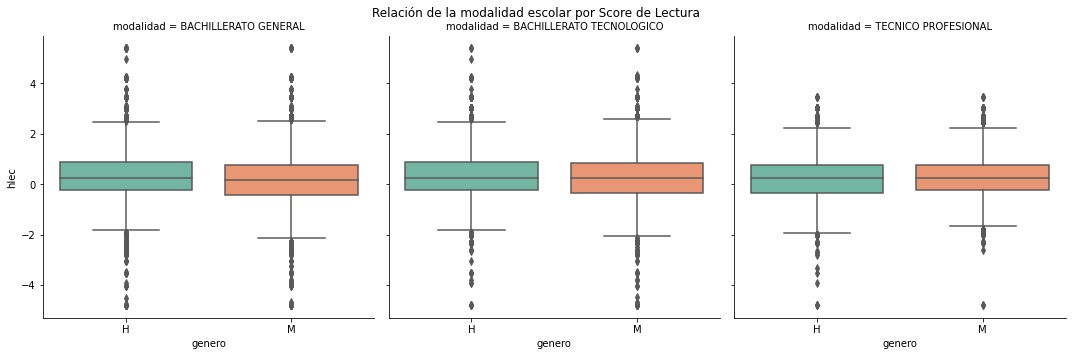

In [24]:
#Análisis Categorical to Quantitative relationship

g = sns.FacetGrid(alumn, col="modalidad", margin_titles=True, height=5, aspect=1)
g.map(sns.boxplot, "genero", "hlec", palette='Set2');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relación de la modalidad escolar por Score de Lectura')



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Relación del tipo de institución por Score de Lectura')

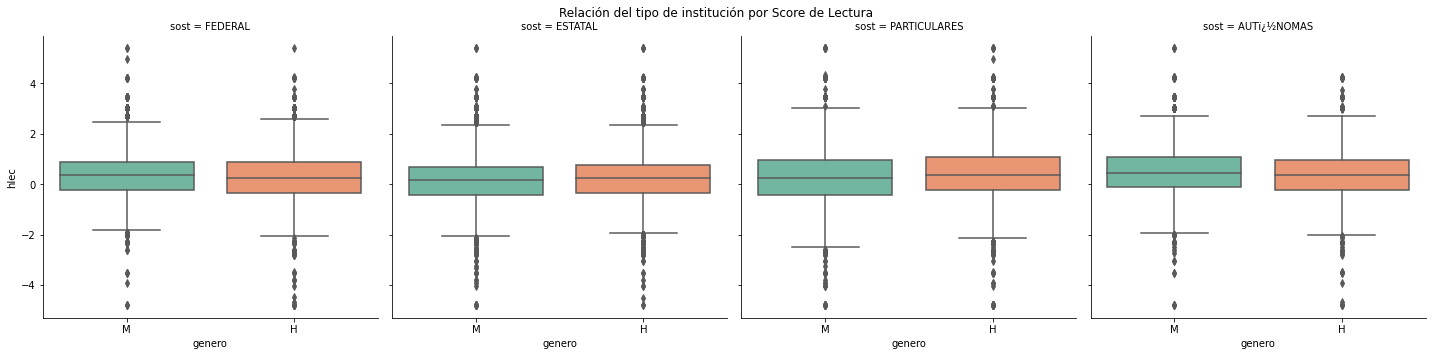

In [23]:
#Análisis Categorical to Quantitative relationship

g = sns.FacetGrid(alumn, col="sost", margin_titles=True, height=5, aspect=1)
g.map(sns.boxplot, "genero", "hlec", palette='Set2');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relación del tipo de institución por Score de Lectura')


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Relación de de la modalidad escolar por Score de Matemáticas')

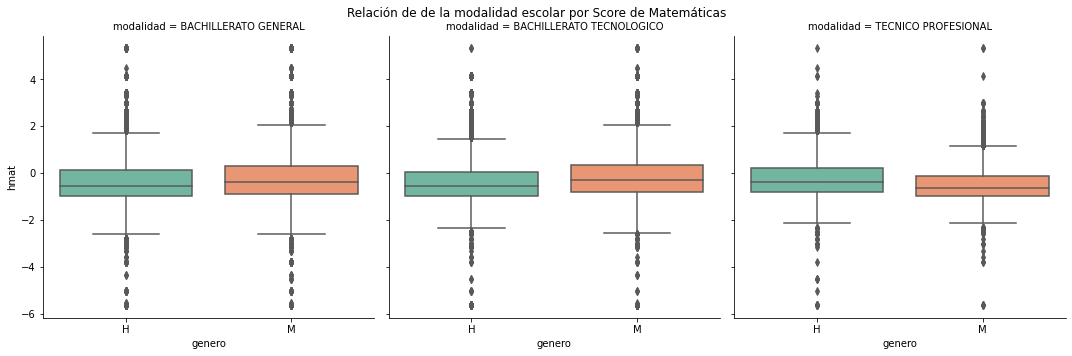

In [25]:
#Análisis Categorical to Quantitative relationship

g = sns.FacetGrid(alumn, col="modalidad", margin_titles=True, height=5, aspect=1)
g.map(sns.boxplot, "genero", "hmat", palette='Set2');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relación de de la modalidad escolar por Score de Matemáticas')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Relación  del tipo de institución por Score de Matemáticas')

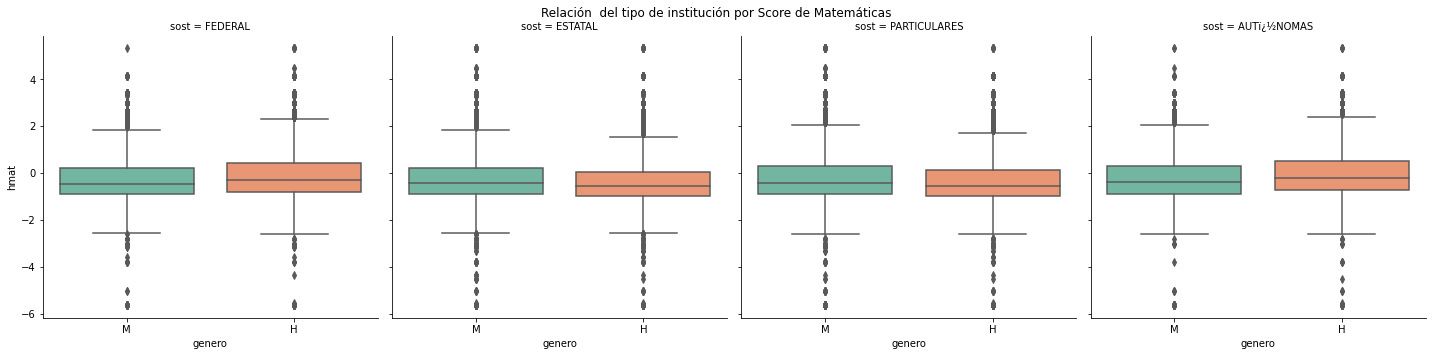

In [26]:
#Análisis Categorical to Quantitative relationship

g = sns.FacetGrid(alumn, col="sost", margin_titles=True, height=5, aspect=1)
g.map(sns.boxplot, "genero", "hmat", palette='Set2');
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relación  del tipo de institución por Score de Matemáticas')

In [0]:
#Histogramas de Frecuencias

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='modalidad', y='hlec', data=alumn)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

**2) Set de Cuestionarios**

Se toman algunas variables rápidas conforme a ciertas preguntas del cuestionario. Como aún no se ha realizado el feature engineering, solamente se mostrarán las frecuencias

Situación laboral, ¿Trabaja el alumno? pregunta 6:


*   a)	Sí
*   b)	No

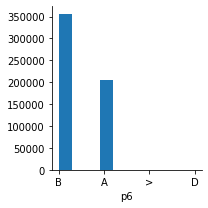

Trayectoria académica, pregunta 67:

* a)	Pública urbana
* b)	Pública rural
* c)	Privada
* d)	Indígena
* e)	Comunitaria


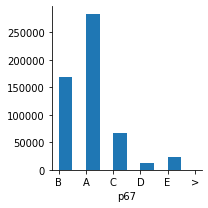

In [0]:
g = sns.FacetGrid(cuest)
g.map(plt.hist, "p67");

Entorno familiar, pregunta 134:
¿Cuentas en tu hogar con una persona adulta que te apoye?
* a)	Sí
* b)	No

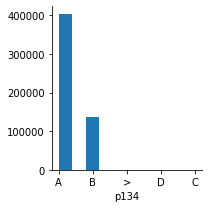

In [0]:
g = sns.FacetGrid(cuest)
g.map(plt.hist, "p134");